# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,6570.0,7
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,6820.0,8
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,7930.0,5
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,4140.0,7
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,5150.0,7


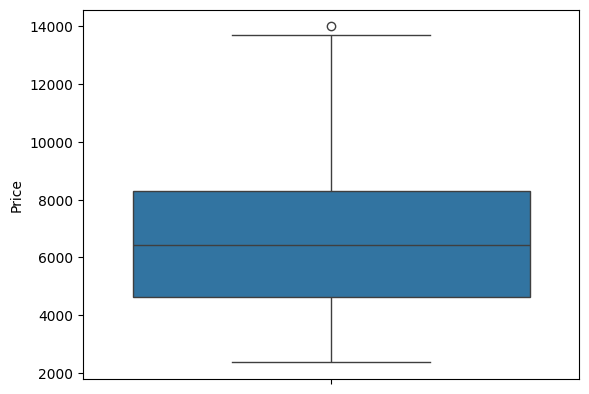

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/cars_hw.csv')
df.head()
df['Age'] = 2024 - df['Make_Year']
# df['Price'].describe()
# df['Price'].hist()

df['Price'] = df['Price']/100
df = df[df['Price'] <= 14000]
df = df[df['Price'] >= 2000]
df['Price'].describe()
df0 = df.copy()
plt = sns.boxplot(df['Price'])
df.describe()
df0.head()

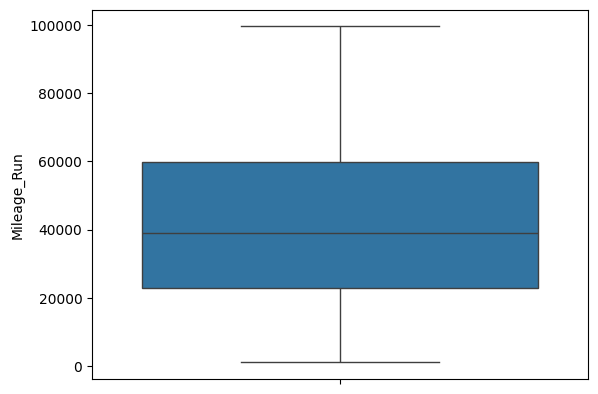

In [22]:
pltw = sns.boxplot(df['Mileage_Run'])

<Axes: xlabel='Age', ylabel='Price'>

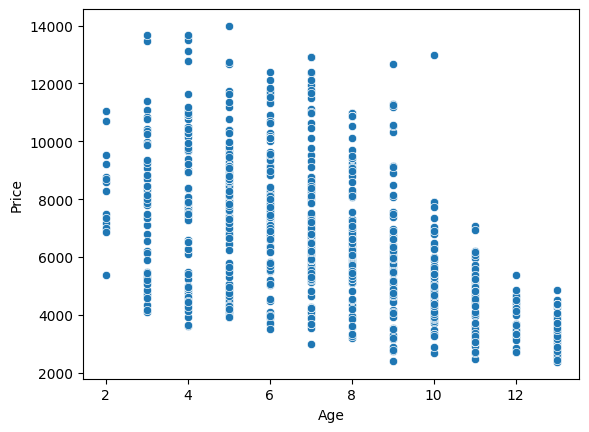

In [36]:
sns.scatterplot(data=df, x='Age', y='Price')

Transform Categorical variables

In [29]:

num_car_types = df['Body_Type'].value_counts()
print("Number of different body types:", num_car_types)
df.head()

Number of different body types: Body_Type
hatchback    483
sedan        219
suv          152
muv           38
crossover     21
Name: count, dtype: int64


,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,6570.0,7
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,6820.0,8
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,7930.0,5
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,4140.0,7
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,5150.0,7


In [85]:
# df = pd.get_dummies(df, columns=['Transmission_Type', 'Fuel_Type', 'Transmission', 'Body_Type' ], drop_first=True)
df.head()
kinds = df['Make'].value_counts()
print("Number of different body types:", kinds)
car_type_counts = df0['Make'].value_counts()
valid_car_types = car_type_counts[car_type_counts >= 15].index

df0 = df0[df0['Make'].isin(valid_car_types)]

Number of different body types: Make
Hyundai          299
Maruti Suzuki    293
Honda             71
Renault           68
Ford              52
Toyota            50
Volkswagen        29
Mahindra          17
Tata              15
Chevrolet          6
Nissan             4
Skoda              4
Datsun             3
Jeep               1
Kia                1
Name: count, dtype: int64


In [39]:
#Stolen function

def slr(x,y): # Single Linear Regression Function
    x_bar = np.mean(x)
    y_bar = np.mean(y)
    b1 = np.inner(x-x_bar,y-y_bar)/np.inner(x-x_bar,x)
    b0 = y_bar - b1*x_bar
    y_hat = b0 + b1*x
    residuals = y - y_hat
    return({'b0':b0,'b1':b1,'y_hat':y_hat,'residuals':residuals})



80/20 train test split

In [64]:
df0.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Age
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,6570.0,7
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,6820.0,8
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,7930.0,5
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,4140.0,7
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,5150.0,7


In [72]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

X = df0.loc[:,['Age', 'Body_Type']]
y = df0['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


Z_train = pd.concat([X_train[['Age']],
                     pd.get_dummies(X_train['Body_Type'], dtype='int')], axis = 1)

Z_test = pd.concat([X_train[['Age']],
                     pd.get_dummies(X_test['Body_Type'], dtype='int')], axis = 1)

Z_test = Z_test.reindex(columns=Z_train.columns, fill_value=0)
reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)



y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse) # R2
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


X = df0[['Age', 'Body_Type']]
y = df0['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


Z_train = pd.concat([X_train[['Age']], pd.get_dummies(X_train['Body_Type'], dtype=int)], axis=1)
Z_test = pd.concat([X_test[['Age']], pd.get_dummies(X_test['Body_Type'], dtype=int)], axis=1)


reg = LinearRegression(fit_intercept=False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test)) # R2
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.592717675494518
RMSE:  1518.8262028290414


,variable,coefficient
0,Age,-409.006469
1,crossover,9802.820904
2,hatchback,8506.324368
3,muv,8898.621128
4,sedan,10770.949757
5,suv,12237.091538


In [86]:
df0['age_sq'] = df0['Age']**2
df0['Mile_Sq'] = df0['Mileage_Run']**2

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


X = df0[['age_sq', 'Mile_Sq', 'Make']]
y = df0['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


Z_train = pd.concat([X_train[['age_sq']], X_train[['Mile_Sq']], pd.get_dummies(X_train['Make'], dtype=int)], axis=1)
Z_test = pd.concat([X_test[['age_sq']], X_test[['Mile_Sq']], pd.get_dummies(X_test['Make'], dtype=int)], axis=1)


reg = LinearRegression(fit_intercept=False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.5098146295536092
RMSE:  1824.4241094838042


<ipython-input-86-8b92310ba04c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['age_sq'] = df0['Age']**2
<ipython-input-86-8b92310ba04c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df0['Mile_Sq'] = df0['Mileage_Run']**2


,variable,coefficient
0,age_sq,-3.603792e+01
1,Mile_Sq,1.692885e-07
2,Ford,8.233654e+03
3,Honda,9.285658e+03
4,Hyundai,8.681244e+03
5,Mahindra,1.216957e+04
6,Maruti Suzuki,7.793436e+03
7,Renault,7.516514e+03
8,Tata,8.211916e+03
9,Toyota,9.584359e+03


In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np


X = df0[['age_sq', 'Mile_Sq', 'Age', 'Mileage_Run']]
y = df0['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)


Z_train = pd.concat([X_train[['age_sq', 'Mile_Sq', 'Age', 'Mileage_Run']]], axis=1)
Z_test = pd.concat([X_test[['age_sq', 'Mile_Sq', 'Age', 'Mileage_Run']]], axis=1)



reg = LinearRegression(fit_intercept=False).fit(Z_train, y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.14981587872880986
RMSE:  2402.714253141795


,variable,coefficient
0,age_sq,-1.643804e+02
1,Mile_Sq,-1.983046e-07
2,Age,2.154548e+03
3,Mileage_Run,2.974676e-02


This model which allows curves due to the polynomial terms has a higher RMSE and lower Rsq. I feel a bit stuck because I am not really sure what to think or hopw to move forward with a better model without overfitting.

In [ ]:
import matplotlib.pyplot as plt
x = df['Age']
y = df['Price']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Age")
plt.ylabel("Price")
plt.legend(loc='upper right')
# plt.title('Linear Regression: Looks OK')

plt.show()

In [ ]:
import matplotlib.pyplot as plt
x = df['Mileage_Run']
y = df['Price']

coef = slr(x,y)

y_hat = coef['b0']+coef['b1']*x
plt.scatter(x,y,label='Data')
plt.plot(x,y_hat,label='Regression Line',color='black')
plt.xlabel("Age")
plt.ylabel("Price")
plt.legend(loc='upper right')
# plt.title('Linear Regression: Looks OK')

plt.show()

**Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?**

I've learned it is easy to overfit. I thought adding car brand would be useful but appears it overfit the model. Creating models feels like something that takes real practice and the ability to think through what variables may actually be meaningful. I am unsure still of if I am improving the model, or increasing Rsquared through overfitting.